# LENDING CLUB CASE STUDY

In [49]:
#Importing Pandas package
import pandas as pd
#Importing Numpy package
import numpy as np
# Importing missingno package
#import missingno as msno
import matplotlib.pyplot as plt

#Lending Club Case study

#Reading the CSV file using Pandas and converting it to the data frame
df = pd.read_csv('loan.csv')


 
#Sorting and collecting the data only for Fully paid and Charged Off
#We are removing the current loan status from the list since the current status indicates already a loan is going on and our 
#analysis is for the investors to decide on funding on accepted new loans
loan_status = ['Fully Paid','Charged Off']
Filter_df = df.loc[df['loan_status'].isin(loan_status)]

#Removing the customer behaviour variable because these variables are related to customer who is having current loan
#But our goal is to suggest the investor on new loan to borrowers with existing data

loan_df = Filter_df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type'],axis =1)
  
#Removing the columns where the null values precentage is greater than 90%
#In these columns only the values marked are NA
Final_loan = loan_df.drop(['annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'],axis =1)

#msno.matrix(Final_loan)


#Removing the months string from column 'term' for calculations
Final_loan['term'] = Final_loan['term'].str.replace('\D','',regex=True)


Final_loan1 = Final_loan.drop(['url','pymnt_plan','zip_code','desc','id'],axis=1)
#Removing the % symbol from interest rate
Final_loan1['int_rate'] = Final_loan1['int_rate'].str.replace('%','',regex=True)
Final_loan1['emp_length'] = Final_loan1['emp_length'].str.replace('years','',regex=True)
Final_loan1['emp_length'] = Final_loan1['emp_length'].str.replace('year','',regex=True)

Final_loan1['emp_length'] = Final_loan1['emp_length'].str.replace('< 1','0',regex=True)

Final_loan1['emp_length'] = Final_loan1['emp_length'].str.replace('+','0',regex=True)




#Renaming columns with more readable title
Final_loan1.rename(columns={'emp_length': 'wrk_experience', 'issue_d': 'loan_funded_date', 'addr_state': 'State','dti': 'debt_income_ratio','pub_rec_bankruptcies': 'bankruptcies'}, inplace=True)
#Final_loan1.to_csv("loan1.csv")


#Checking if there are duplicate entries for borrowers based on member_id column
duplicate = Final_loan1[Final_loan1.duplicated('member_id')]
#Since there are no duplicates, dropping the column memeber_id
Final_loan1 = Final_loan1.drop(['member_id'],axis=1)



#Wrk_experience is an impactful variable. But the data type of this variable is "Object" which makes it tough to analyse.
#Hence, standardising the data type of wrk_experience column

Final_loan1['wrk_experience'] = Final_loan1['wrk_experience'].astype(str).astype(float)



#Wrk_experience is a continuous quantitative variable with lot of differnet values Binning the wrk_experience column to three buckets for better analysis : Experience within one year, 1-10 year and more than 10 years
bins = [-1, 0, 10, 100]
labels = ["Within1","1-10","more than 10"]
Final_loan1['Wrk_experience_range'] = pd.cut(Final_loan1['wrk_experience'], bins, labels)

#After data cleaning and filtration,  our data set has 21 columns
#Understanding of columns


#1.
#2.
#3.



C:\Users\kosala.priya.c.r@sap.com\AppData\Local\Temp\ipykernel_3868\2200646011.py:12: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   funded_amnt           38577 non-null  int64   
 2   funded_amnt_inv       38577 non-null  float64 
 3   term                  38577 non-null  object  
 4   int_rate              38577 non-null  object  
 5   installment           38577 non-null  float64 
 6   grade                 38577 non-null  object  
 7   sub_grade             38577 non-null  object  
 8   emp_title             36191 non-null  object  
 9   wrk_experience        37544 non-null  float64 
 10  home_ownership        38577 non-null  object  
 11  annual_inc            38577 non-null  float64 
 12  verification_status   38577 non-null  object  
 13  loan_funded_date      38577 non-null  object  
 14  loan_status           38577 non-null  object  
 15  pu

In [ ]:
#Univariate analysis
#before we derive insights from univariate analysis,we try to classify what kind of variables do we have
#As we have learnt, there are three main types : Ordered Categorical, Unordered Categorical and Quantitative Variables
# Below is the results of classifying the variables we have in our data set to theese three types

#1. Ordered Categorical : term, grade, sub_grade, Wrk_experience_range, bankruptcies
#2. Unordered Categorical : purpose, verification_status, loan_status, state
#3.Quantitative : loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc, debt_income_ratio

<Axes: >

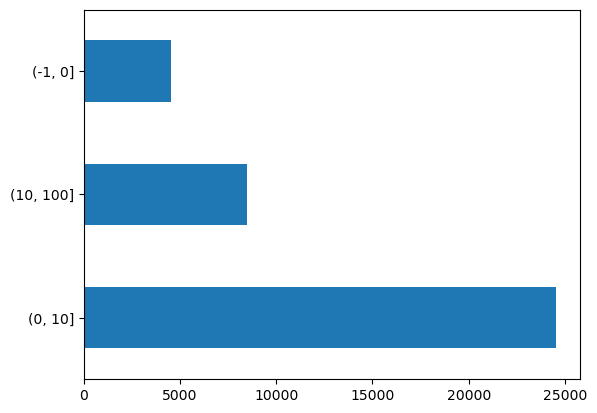

In [50]:
#1. Wrk_experience_range is now an ordered categroical variable since this can be categorixed into one of the three buckets and they follow an increasing order
Final_loan1['Wrk_experience_range'].value_counts().plot(kind="barh")
#Final_loan1.boxplot(column=['Wrk_experience_range'], grid=False, color='black')


In [ ]:
#Observation : Clearly, people who have 1-10 years of work experience have taken more loans compared to others. 


In [54]:
#2. 'bankruptcies' is another ordered categorical variable. 
# Finding maximum bankruptcy in the given data set and finding the entries corresponding to that
bankruptcies_df = Final_loan1[Final_loan1['bankruptcies'] == Final_loan1['bankruptcies'].max()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,wrk_experience,...,annual_inc,verification_status,loan_funded_date,loan_status,purpose,title,State,debt_income_ratio,bankruptcies,Wrk_experience_range
14127,3600,3600,3600.0,36,17.99,130.14,E,E1,DENT FIX EQUIPMENT,100.0,...,85000.0,Source Verified,Jun-11,Fully Paid,debt_consolidation,Debt Consolidation Loan,CA,6.35,2.0,"(10, 100]"
18724,15000,15000,15000.0,36,16.40,530.33,E,E1,DELTA MECHANICAL,6.0,...,98000.0,Source Verified,Mar-11,Charged Off,debt_consolidation,DEBT CONSOLIDATION LOAN,AZ,11.41,2.0,"(0, 10]"
23127,8000,8000,8000.0,36,13.35,270.91,C,C4,Regions Bank,0.0,...,34000.0,Verified,Nov-10,Fully Paid,credit_card,Consolidation,NC,16.62,2.0,"(-1, 0]"
23381,10000,10000,10000.0,36,10.36,324.37,B,B5,Armand morin network,7.0,...,45600.0,Source Verified,Nov-10,Charged Off,credit_card,Cc payoff,NC,15.92,2.0,"(0, 10]"
31554,3000,3000,3000.0,36,16.82,106.69,E,E2,JPMorgan Chase,9.0,...,37100.0,Not Verified,Mar-10,Fully Paid,other,Dental Works,AZ,17.92,2.0,"(0, 10]"


In [ ]:
#Observation : There are five entries where more than 1 bankruptcy is reported. These members could be directly blacklisted for further approvals
# We could also define criteria that more than 1 bankruptcy loan wont be given

C:\Users\kosala.priya.c.r@sap.com\AppData\Local\Temp\ipykernel_3868\3622316899.py:12: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


<Axes: >

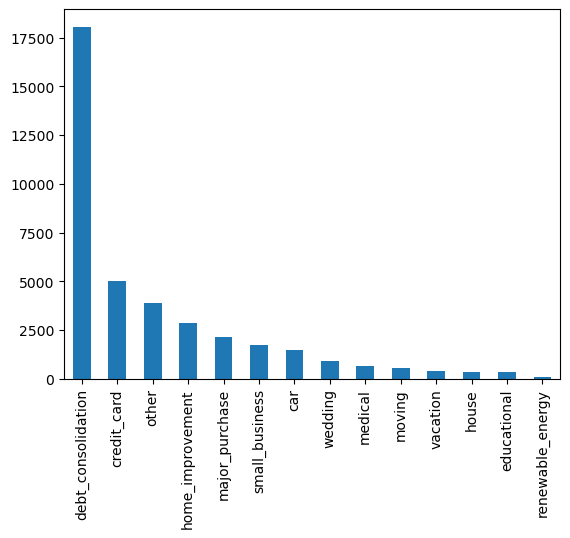

In [27]:
#3. 'purpose' is a unordered categorical variable -  Plotting Rank-Frequency plot for this could give us useful insights
Final_loan1['purpose'].value_counts().plot(kind="bar")

In [ ]:
#Observation : from the given data set, people have taken loan mainly for debt_consolidation 

<Axes: >

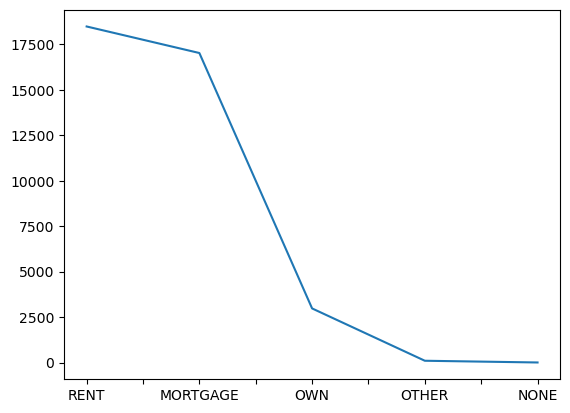

In [61]:
#4. Home ownership is another categorical but unordered set of data
#Taking the mode of this could give us some insights

Final_loan1['home_ownership'].value_counts().plot(kind="line")


In [62]:
#Observation : people who own houses rarely take loans

In [75]:
#5. State is an unordered categorical variable. Lets plot the Rank-frequency plot to see the behaviour
#Final_loan1['State'].value_counts()
############################################Discuss what kind of plot can be used
 

In [77]:
#6. "debt_income_ratio" is a quantitative variable
Final_loan1['debt_income_ratio'].max()

29.99